# Mass Change
**Description:**  Ice sheet height and thickness changes from ICESat to ICECast-2.

Choose the data to plot by passing a string to `version` with the format "gris_VERSION" where  VERSION is "dhdt" for total thickness change or "dmdt" for corrected for firn-air content. 

Optionally add "_filt" to retrieve a filtered version of the data.

**Datasets:** 

N.A.

**Associated papers:** 

Smith, B., Helen A. Fricker, Alex S. Gardner, Brooke Medley, Johan Nilsson, Fernando S. Paolo, Nicholas Holschuh, et al. “Pervasive Ice Sheet Mass Loss Reflects Competing Ocean and Atmosphere Processes.” Science, April 30, 2020, eaaz5845. https://doi.org/10.1126/science.aaz5845.


In [1]:
from __future__ import annotations

%%capture
%load_ext autoreload
%autoreload 2

import itertools
import os

from polartoolkit import fetch, maps, regions, utils

In [2]:
# set default to northern hemisphere for this notebook
os.environ["POLARTOOLKIT_HEMISPHERE"] = "north"

In [3]:
versions = ["dhdt", "dmdt"]
filts = ["", "_filt"]

combos = list(itertools.product(*[versions, filts]))

version_names = [f"gris_{s[0]}{s[1]}" for s in combos]


grids = []
for name in version_names:
    data = fetch.mass_change(version=name)
    grids.append(data)
    print(f"Info for {name}")
    _ = utils.get_grid_info(data, print_info=True)
    print("##########")

Info for gris_dhdt
grid spacing: 5000.0 m
grid region: (-626302.876984, 818697.123016, -3236440.11184, -681440.111839)
grid zmin: -58.5592041016
grid zmax: 1.15196788311
grid registration: p
##########
Info for gris_dhdt_filt
grid spacing: 5000.0 m
grid region: (-626302.876984, 818697.123016, -3236440.11184, -681440.111839)
grid zmin: -36.8038787842
grid zmax: 0.690221190453
grid registration: p
##########
Info for gris_dmdt
grid spacing: 5000.0 m
grid region: (-626302.876984, 818697.123016, -3236440.11184, -681440.111839)
grid zmin: -58.5592041016
grid zmax: 1.15196788311
grid registration: p
##########
Info for gris_dmdt_filt
grid spacing: 5000.0 m
grid region: (-626302.876984, 818697.123016, -3236440.11184, -681440.111839)
grid zmin: -36.8038787842
grid zmax: 0.690221190453
grid registration: p
##########


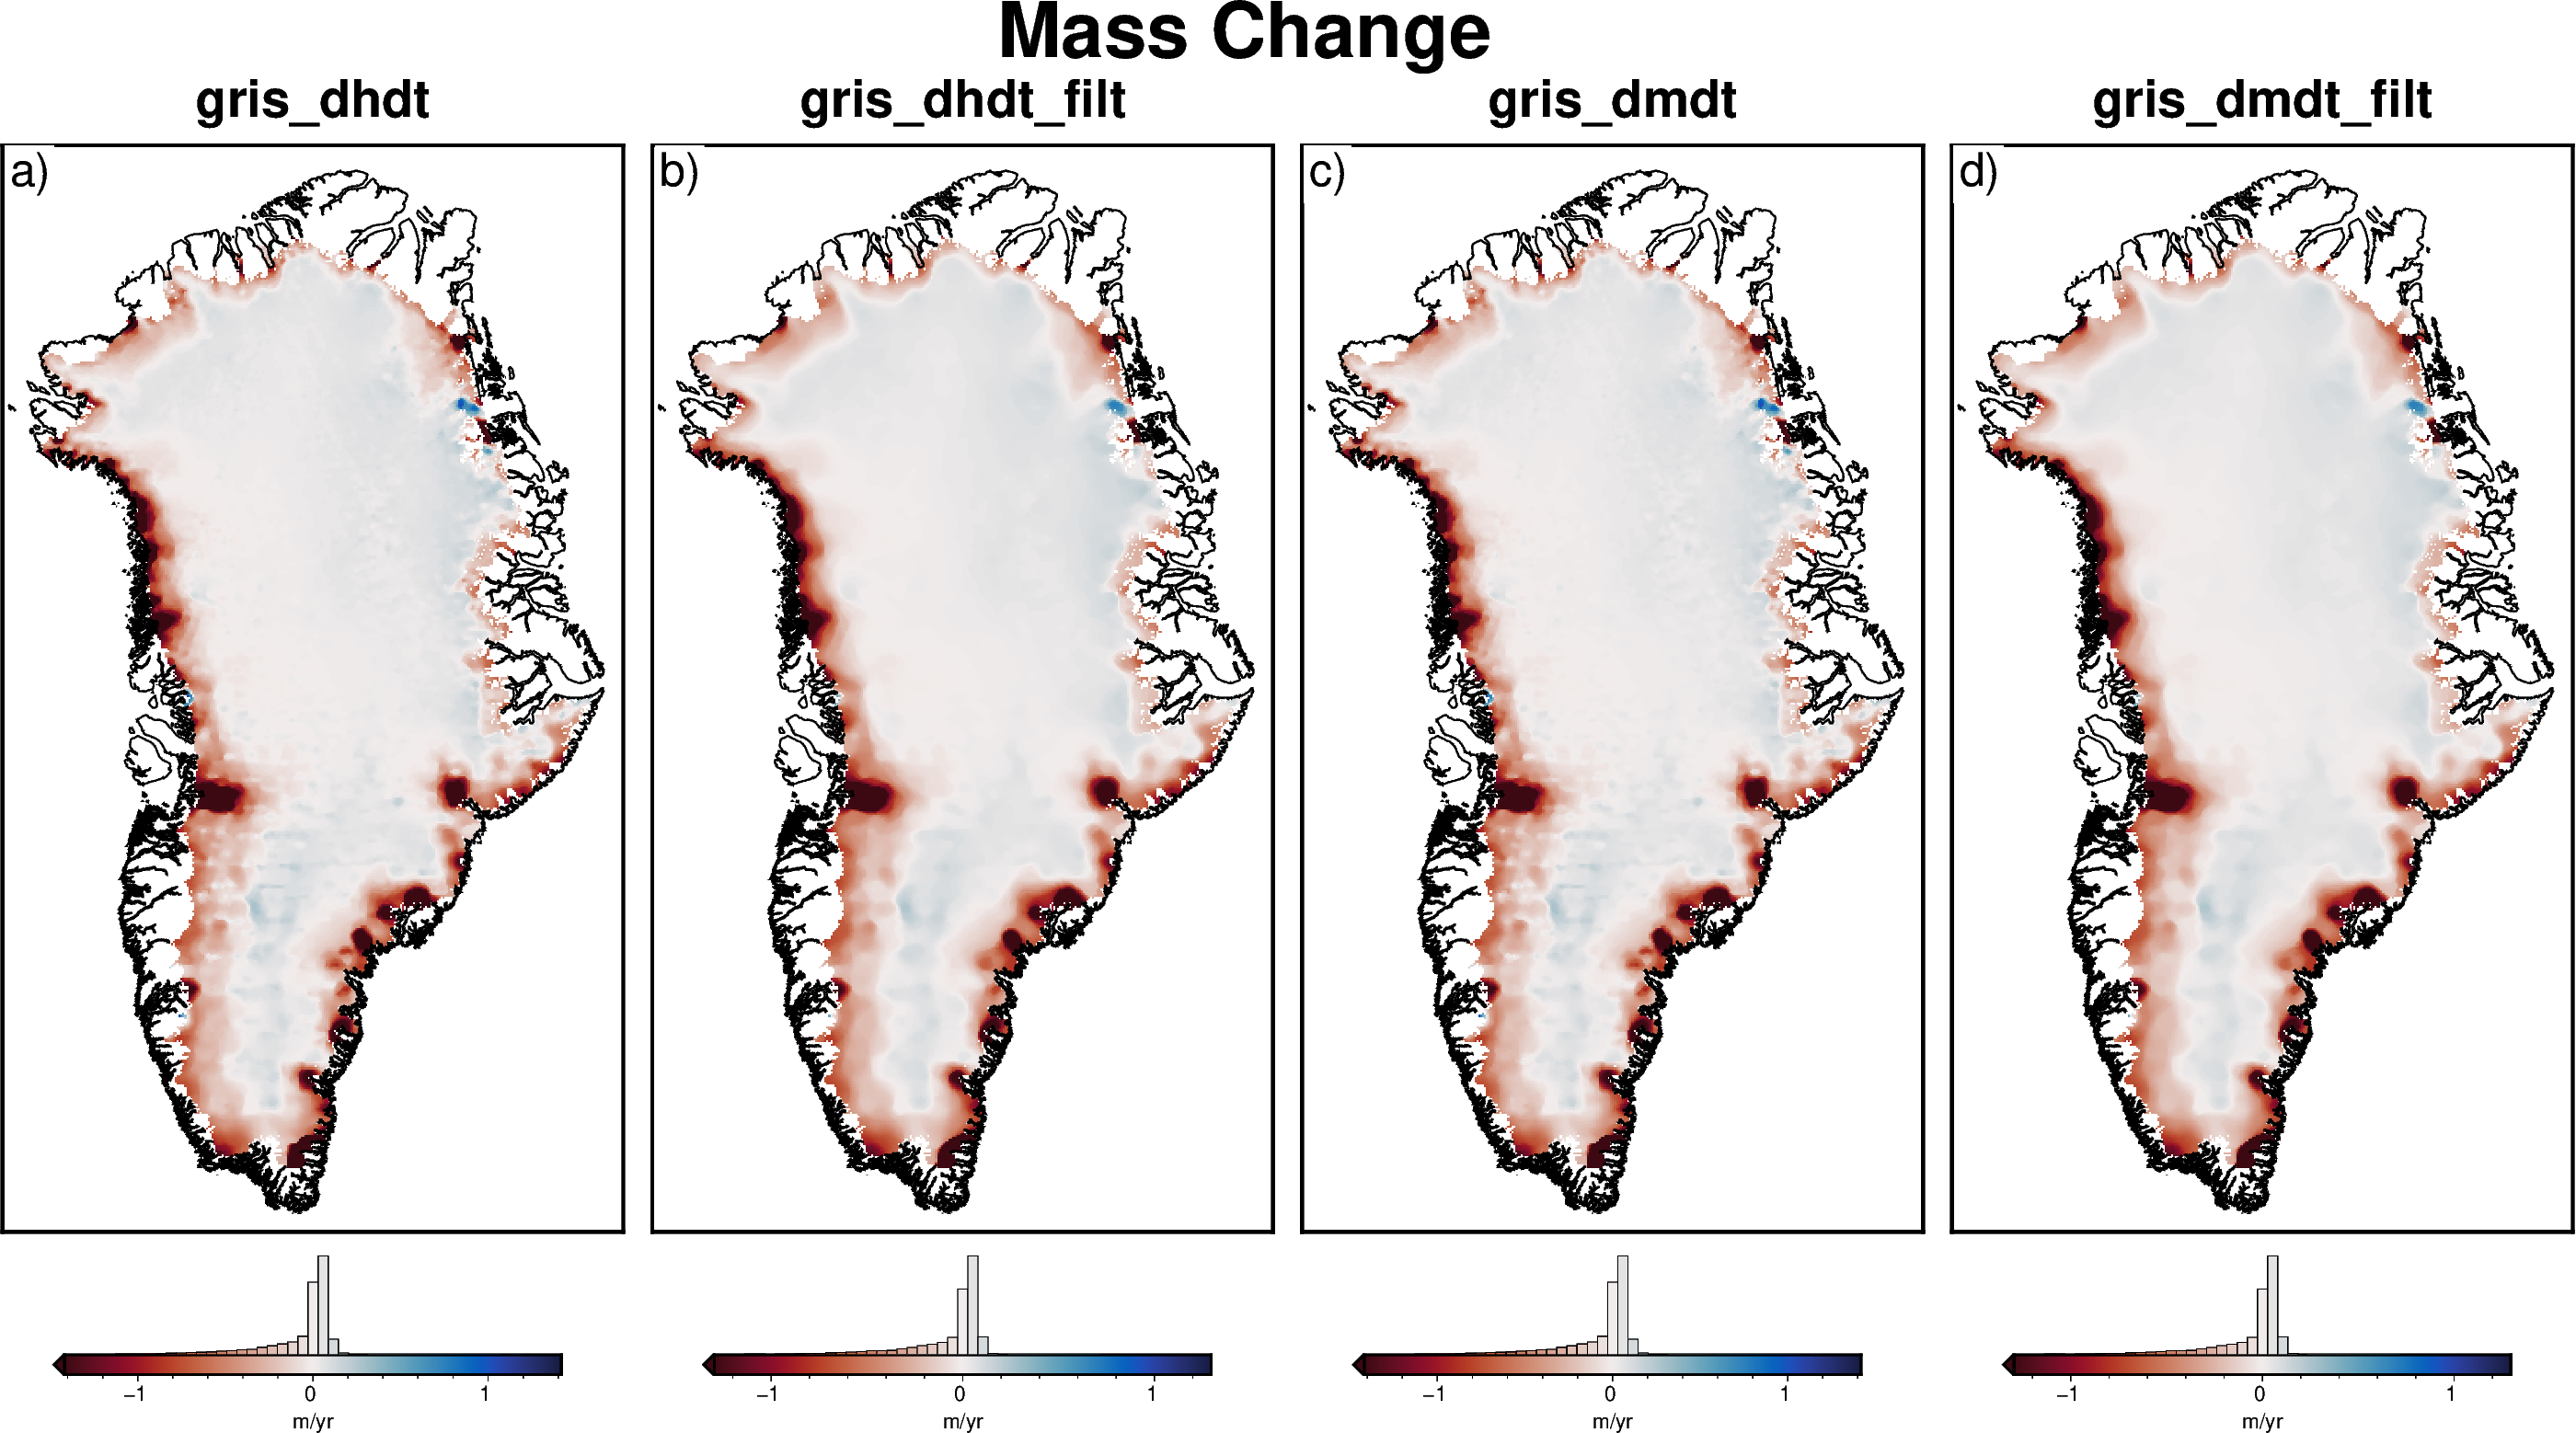

In [6]:
fig = maps.subplots(
    grids,
    region=regions.greenland,
    dims=(1, 4),
    fig_title="Mass Change",
    titles=version_names,
    cbar_label="m/yr",
    margins=".5c/1.3c",
    coast=True,
    cmap="balance+h0",
    robust=True,
    hist=True,
    reverse_cpt=True,
    absolute=True,
)
fig.show(dpi=200)